# Hands-on Exercise CLASS Module

In [1]:
!pip install --user mlxtend

You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np

#Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

#Classification Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Ensemble Methods
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import AdaBoostClassifier

#Mlxtend for visualizing classification decision boundaries
from mlxtend.plotting import plot_decision_regions


In [3]:
# Generating Data1

np.random.seed(100)

a = np.random.multivariate_normal([2,2],[[0.5,0], [0,0.5]], 200)
b = np.random.multivariate_normal([4,4],[[0.5,0], [0,0.5]], 200)

Data1_X = np.vstack((a,b))
Data1_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)


# Generating Data2

np.random.seed(100)

a1 = np.random.multivariate_normal([2,2],[[0.25,0], [0,0.25]],200)
a2 = np.random.multivariate_normal([2,4],[[0.25,0], [0,0.25]],200)
a3 = np.random.multivariate_normal([4,2],[[0.25,0], [0,0.25]],200)
a4 = np.random.multivariate_normal([4,4],[[0.25,0], [0,0.25]],200)

Data2_X = np.vstack((a1,a4,a2,a3))
Data2_Y = np.hstack((np.ones(400).T,np.zeros(400).T)).astype(int)


# Generating Data3

np.random.seed(100)

a1 = np.random.uniform(4,6,[200,2])
a2 = np.random.uniform(0,10,[200,2])

Data3_X = np.vstack((a1,a2))
Data3_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)


# Generating Data4

np.random.seed(100)

Data4_X = np.random.uniform(0,12,[500,2])
Data4_Y = np.ones([500]).astype(int)
Data4_Y[np.multiply(Data4_X[:,0],Data4_X[:,0]) + np.multiply(Data4_X[:,1],Data4_X[:,1]) - 100 < 0 ] = 0

### 1. Decision Tree

Use __Data3__ to answer the following questions.

<span style="color:red">**Question 1a:** </span> Compute and print the 10-fold cross-validation accuracy using decision tree classifiers with max_depth = 2,4,6,8,10, and 50. 

In [4]:
dt1 = DecisionTreeClassifier(max_depth=2)
dt1_scores = cross_val_score(dt1, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print (dt1_scores)
[dt1_scores.mean(), dt1_scores.std()]

[0.8   0.9   0.9   0.875 0.925 0.875 0.9   0.85  0.85  0.875]


[0.875, 0.03354101966249685]

In [5]:
dt2 = DecisionTreeClassifier(max_depth=4)
dt2_scores = cross_val_score(dt2, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print (dt2_scores)
[dt2_scores.mean(), dt2_scores.std()]

[0.95  0.975 0.975 0.975 1.    1.    0.975 0.925 0.975 0.95 ]


[0.97, 0.021794494717703363]

In [6]:
dt3 = DecisionTreeClassifier(max_depth=6)
dt3_scores = cross_val_score(dt3, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print (dt3_scores)
[dt3_scores.mean(), dt3_scores.std()]

[0.95  0.975 0.975 0.975 1.    1.    0.95  0.925 0.975 0.95 ]


[0.9674999999999999, 0.0225]

In [7]:
dt4 = DecisionTreeClassifier(max_depth=8)
dt4_scores = cross_val_score(dt4, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print (dt4_scores)
[dt4_scores.mean(), dt4_scores.std()]

[0.95  0.975 0.95  0.95  1.    0.975 0.9   0.875 0.975 0.95 ]


[0.9499999999999998, 0.03535533905932737]

In [8]:
dt5 = DecisionTreeClassifier(max_depth=10)
dt5_scores = cross_val_score(dt5, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print (dt5_scores)
[dt5_scores.mean(), dt5_scores.std()]

[0.925 0.95  0.95  0.95  1.    0.975 0.9   0.875 0.95  0.95 ]


[0.9424999999999999, 0.03363406011768426]

In [9]:
dt6 = DecisionTreeClassifier(max_depth=50)
dt6_scores = cross_val_score(dt6, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print (dt6_scores)
[dt6_scores.mean(), dt6_scores.std()]

[0.925 0.975 0.925 0.95  1.    0.975 0.925 0.9   0.95  0.925]


[0.9450000000000001, 0.02915475947422648]

<span style="color:red">**Question 1b:** </span> For what values of max_depth did you observe the lowest accuracy? What is this phenomenon called?

Max_Depth 2 has lowest accuracy with 0.87249999999999994 as mean which determines the overall performance is a bit low compared to the rest.
This phenomenon is called underfitting of data.

<span style="color:red">**Question 1c:** </span> What accuracy did you observe for max depth=50? What is the difference between this accuracy and the highest accuracy? What is this phenomenon called?

0.94000000000000006 as average accuracy for 10-folds. Difference is approximately 0.0324.This phenomenon is called overfitting of data.

<span style="color:red">**Question 1d:** </span> Plot decision regions for the above decision tree models

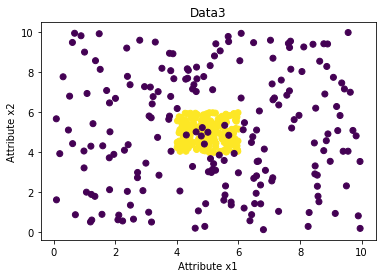

In [10]:
plt.scatter(Data3_X[:,0],Data3_X[:,1], c=Data3_Y)
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Data3')
plt.show()

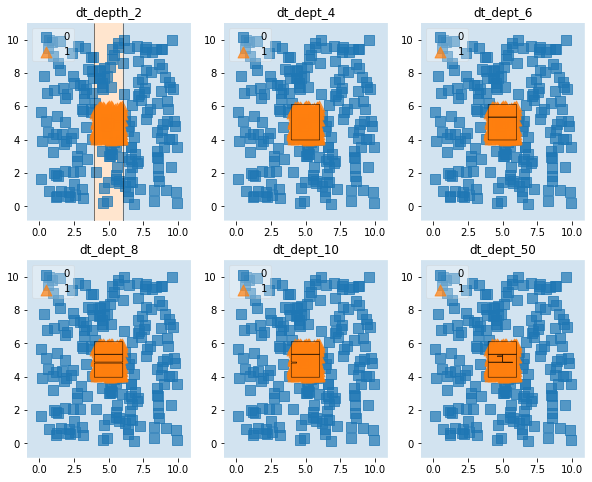

In [73]:
# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

# Creating a list of classifiers and their names for plotting
clf_list = [dt1,dt2,dt3,dt4,dt5,dt6]
labels = ['dt_depth_2','dt_dept_4','dt_dept_6','dt_dept_8','dt_dept_10','dt_dept_50']

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data3_X, Data3_Y)
    ax = plt.subplot(2,3,count)
    fig = plot_decision_regions(X=Data3_X, y=Data3_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)
plt.show()

<span style="color:red">**Question 1e:** </span> Based on the decision regions, which depth is better suited for this data? Explain your reason.

Depth 4 is best suited. From the above plot, we can see it's classifying data(0's from 1's) in a significant manner.

### 2. k Nearest Neighbor

Use __Data2__ to answer the following questions.

<span style="color:red">**Question 2a:** </span>
 Compute and print the 10-fold cross-validation accuracy for a kNN classifier with n_neighbors = 1, 5, 10, 50

In [12]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1_scores = cross_val_score(knn1, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print (knn1_scores)
[knn1_scores.mean(), knn1_scores.std()]

[0.925  0.8875 0.925  0.8875 0.925  0.9375 0.8875 0.925  0.9375 0.8875]


[0.9125, 0.02091650066335192]

In [13]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2_scores = cross_val_score(knn2, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print (knn2_scores)
[knn2_scores.mean(), knn2_scores.std()]

[0.9875 0.9125 0.925  0.9125 0.95   0.95   0.8625 0.95   0.9625 0.9375]


[0.9349999999999999, 0.0325]

In [14]:
knn3 = KNeighborsClassifier(n_neighbors=10)
knn3_scores = cross_val_score(knn3, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print (knn3_scores)
[knn3_scores.mean(), knn3_scores.std()]

[0.9875 0.9    0.95   0.925  0.9625 0.95   0.8625 0.9375 0.9625 0.9625]


[0.9400000000000001, 0.03436931771216879]

In [15]:
knn4 = KNeighborsClassifier(n_neighbors=50)
knn4_scores = cross_val_score(knn4, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print (knn4_scores)
[knn4_scores.mean(), knn4_scores.std()]

[0.9875 0.9    0.9625 0.9125 0.9625 0.9375 0.8875 0.9375 0.9625 0.9625]


[0.9412499999999999, 0.030644126680328173]

<span style="color:red">**Question 2b:** </span> For what values of n_neighbors did you observe the lowest accuracy? What is this phenomenon called?

Lowest accuracy is observed for 1_neighbour.This is called underfitting of data.

<span style="color:red">**Question 2c:** </span>  Plot decision regions for a kNN classifier with n_neighbors = 1, 5, 10, 50

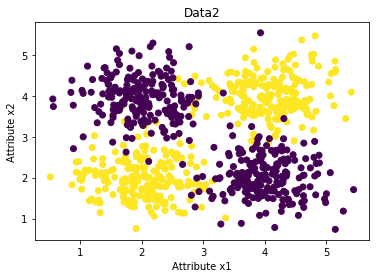

In [16]:
plt.scatter(Data2_X[:,0],Data2_X[:,1], c=Data2_Y)
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Data2')
plt.show()

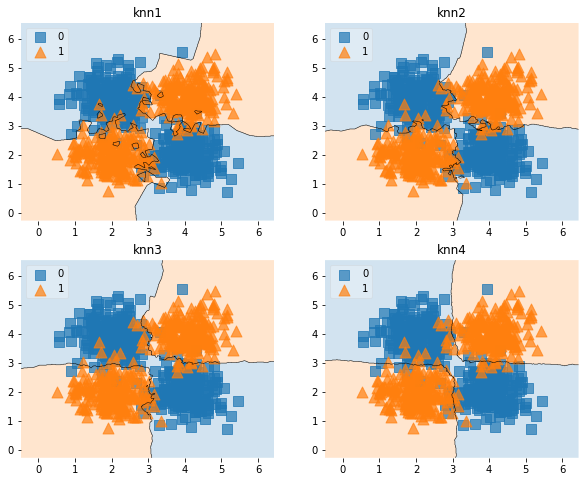

In [17]:
# Creating a list of classifiers and their names for plotting
clf_list = [knn1,knn2,knn3,knn4]
labels = ['knn1','knn2','knn3','knn4']

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data2_X, Data2_Y)
    ax = plt.subplot(2,2,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)
plt.show()

<span style="color:red">**Question 2d:** </span>  From the plots for __Question 2c__ what do you notice about the nature of decision boundary as the n_neighbors are increasing.

Decision boundary becomes smoother as n increases.

### 3. Naive Bayes

<span style="color:red">**Question 3a:** </span> Compute and print the 10-fold cross-validation accuracy for a NB classifier on all four datasets: Data1, Data2, Data3, Data4

In [18]:
nb = GaussianNB()
nb1_scores = cross_val_score(nb, Data1_X, Data1_Y, cv=10, scoring='accuracy')
print (nb1_scores)
[nb1_scores.mean(), nb1_scores.std()]

[0.975 1.    1.    0.925 0.95  0.975 0.975 0.9   0.975 1.   ]


[0.9675, 0.03172144385112379]

In [19]:
nb2_scores = cross_val_score(nb, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print (nb2_scores)
[nb2_scores.mean(), nb2_scores.std()]

[0.075  0.0625 0.0125 0.0875 0.0875 0.025  0.05   0.05   0.0125 0.0375]


[0.049999999999999996, 0.026809513236909017]

In [20]:
nb3_scores = cross_val_score(nb, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print (nb3_scores)
[nb3_scores.mean(), nb3_scores.std()]

[1.    0.95  0.975 0.975 0.975 0.975 0.925 0.9   0.975 0.95 ]


[0.96, 0.027838821814150098]

In [21]:
nb4_scores = cross_val_score(nb, Data4_X, Data4_Y, cv=10, scoring='accuracy')
print (nb4_scores)
[nb4_scores.mean(), nb4_scores.std()]

[0.90196078 1.         0.98       0.98       0.98       0.96
 0.94       0.96       0.97959184 0.95918367]


[0.9640736294517807, 0.026052087140989725]

<span style="color:red">**Question 3b:** </span> State your observations on the datasets the NB algorithm performed poorly.

Performance of NB algorithm is poor on Data2. NB assumes independence between the attributes.But in this dataset, we observe  correlation in attribute1(+ve correlation) and attribute2(-ve correlation) and hence NB performed poor.

# parameters to set size or markers, contours, and transparency
<span style="color:red">**Question 3c:** </span> Plot decision regions for a NB classifier on each of the four datasets

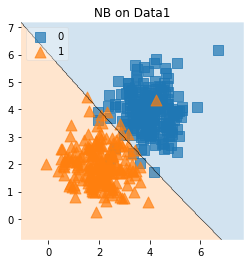

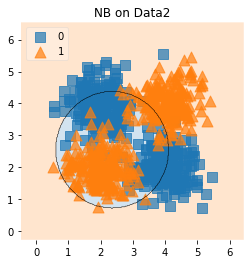

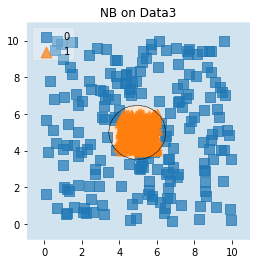

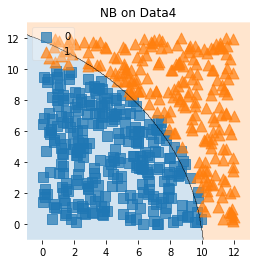

In [22]:
#NB on Data1
fig = plt.figure(figsize=(4,4))
nb.fit(Data1_X,Data1_Y)
plot_decision_regions(X=Data1_X, y=Data1_Y, clf=nb, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title('NB on Data1')
plt.show()

#NB on Data2
fig = plt.figure(figsize=(4,4))
nb.fit(Data2_X,Data2_Y)
plot_decision_regions(X=Data2_X, y=Data2_Y, clf=nb, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title('NB on Data2')
plt.show()

#NB on Data3
fig = plt.figure(figsize=(4,4))
nb.fit(Data3_X,Data3_Y)
plot_decision_regions(X=Data3_X, y=Data3_Y, clf=nb, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title('NB on Data3')
plt.show()

#NB on Data4
fig = plt.figure(figsize=(4,4))
nb.fit(Data4_X,Data4_Y)
plot_decision_regions(X=Data4_X, y=Data4_Y, clf=nb, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title('NB on Data4')
plt.show()

<span style="color:red">**Question 3d:** </span> Describe the shape of the decision boundary on all four datasets. Explain the reason.

On Data1, it's linear. The rest has quadriatic curves as decision boundary. If correlation of one attribute is equal to the correlation of another attribute in a dataset, quadriatic part cancels out and decision boundary is linear(Which is observed in Data1).
P(Y=1|X=x)/P(Y=0|X=x) = (P(X=x|Y=1) * P(Y=1))/(P(X=x|Y=0) * P(Y=0))
Substituting Likelihood with Gaussian Probability ditrubution function and Σ1= Σ0, boundary is linear.

<span style="color:red">**Question 3e:** </span> Based on your plots in __Question 3c__ explain the poor performance of NB on some datasets.

Performance of NB algorithm is poor on Data2. NB assumes independence between the attributes.But in this dataset, we observe  correlation in attribute1(+ve correlation) and attribute2(-ve correlation) and hence NB performed poor.

### 4. Support Vector Machines (Linear)

<span style="color:red">**Question 4a:** </span>  Based on the visualization of the four datasets, assess how well a linear SVM is expected to perform. Specifically, rank the datasets in the order of decreasing accuracy when a linear SVM is used. No need to compute accuracy to answer this question.

1>4>3>2. 1 is linear seperable data and ranks high. Among the rest 3, data4 is seperable with a hyperplane with minimum errors followed by 3. In Data2 SVM performs poor(Both the labels have high amount of error)

<span style="color:red">**Question 4b:** </span>  Compute and print the 10-fold cross-validation accuracy for a linear SVM classifier on all four datasets: Data1, Data2, Data3, Data4

In [23]:
svm_linear = SVC(C=0.5, kernel='linear')
svm_linear_scores1 = cross_val_score(svm_linear, Data1_X, Data1_Y, cv=10, scoring='accuracy')
print (svm_linear_scores1)
[svm_linear_scores1.mean(), svm_linear_scores1.std()]

[0.975 1.    1.    0.95  0.95  0.95  0.975 0.9   0.975 1.   ]


[0.9674999999999999, 0.02968585521759479]

In [24]:
svm_linear_scores2 = cross_val_score(svm_linear, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print (svm_linear_scores2)
[svm_linear_scores2.mean(), svm_linear_scores2.std()]

[0.125  0.1375 0.0125 0.0875 0.2    0.2375 0.1    0.15   0.1875 0.175 ]


[0.14125000000000001, 0.06124999999999999]

In [25]:
svm_linear_scores3 = cross_val_score(svm_linear, Data3_X, Data3_Y, cv=10, scoring='accuracy')
print (svm_linear_scores3)
[svm_linear_scores3.mean(), svm_linear_scores3.std()]

[0.625 0.625 0.65  0.6   0.65  0.7   0.65  0.675 0.625 0.625]


[0.6425000000000001, 0.0275]

In [26]:
svm_linear_scores4 = cross_val_score(svm_linear, Data4_X, Data4_Y, cv=10, scoring='accuracy')
print (svm_linear_scores4)
[svm_linear_scores4.mean(), svm_linear_scores4.std()]

[0.94117647 0.90196078 0.92       0.92       0.98       0.92
 0.94       0.92       0.95918367 0.85714286]


[0.9259463785514207, 0.03147481962633185]

<span style="color:red">**Question 4c:** </span> Rank the datasets in the decreasing order of accuracy of SVM.

1>4>3>2

<span style="color:red">**Question 4d:** </span>  Plot decision regions for a linear SVM classifier on each of the four datasets

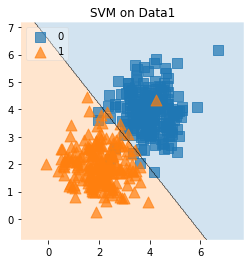

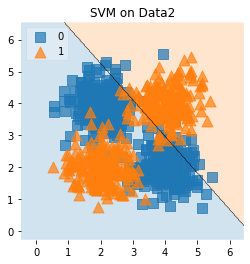

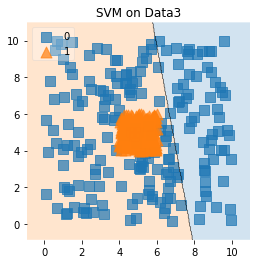

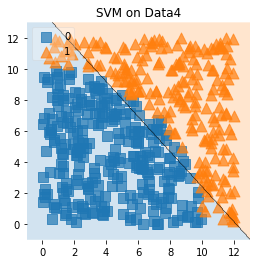

In [27]:
#SVM on Data1
fig = plt.figure(figsize=(4,4))
svm_linear.fit(Data1_X,Data1_Y)
plot_decision_regions(X=Data1_X, y=Data1_Y, clf=svm_linear, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title('SVM on Data1')
plt.show()

#SVM on Data2
fig = plt.figure(figsize=(4,4))
svm_linear.fit(Data2_X,Data2_Y)
plot_decision_regions(X=Data2_X, y=Data2_Y, clf=svm_linear, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title('SVM on Data2')
plt.show()

#SVM on Data3
fig = plt.figure(figsize=(4,4))
svm_linear.fit(Data3_X,Data3_Y)
plot_decision_regions(X=Data3_X, y=Data3_Y, clf=svm_linear, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title('SVM on Data3')
plt.show()

#SVM on Data4
fig = plt.figure(figsize=(4,4))
svm_linear.fit(Data4_X,Data4_Y)
plot_decision_regions(X=Data4_X, y=Data4_Y, clf=svm_linear, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title('SVM on Data4')
plt.show()

<span style="color:red">**Question 4e:** </span>Explain the reason for your observations in __Question 4c__ using observations from the above decision regions.

1>4>3>2. 1 is linear seperable data and ranks high. Among the rest 3, data4 is seperable with a hyperplane with minimum errors followed by 3. In Data2 SVM performs poor(Both the labels have high amount of error)

### 5. Non-linear Support Vector Machines

Use __Data2__ to answer the following questions.

<span style="color:red">**Question 5a:** </span>
Compute and print the 10-fold cross-validation accuracy for an SVM with a polynomial kernel and degree values 1, 2, and 3.

In [28]:
svm_poly1 = SVC(C=0.5, kernel='poly',degree=1, gamma = 'auto')
svm_poly1_scores = cross_val_score(svm_poly1, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print (svm_poly1_scores)
[svm_poly1_scores.mean(), svm_poly1_scores.std()]

[0.1375 0.125  0.0125 0.0875 0.175  0.1875 0.1    0.1625 0.1875 0.1625]


[0.13375, 0.05215661511256266]

In [29]:
svm_poly2 = SVC(C=0.5, kernel='poly',degree=2, gamma = 'auto')
svm_poly2_scores = cross_val_score(svm_poly2, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print (svm_poly2_scores)
[svm_poly2_scores.mean(), svm_poly2_scores.std()]

[0.8125 0.8375 0.8875 0.8375 0.8875 0.8875 0.8625 0.8875 0.9125 0.8375]


[0.865, 0.030516389039334235]

In [30]:
svm_poly3 = SVC(C=0.5, kernel='poly',degree=3, gamma = 'auto')
svm_poly3_scores = cross_val_score(svm_poly3, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print (svm_poly3_scores)
[svm_poly3_scores.mean(), svm_poly3_scores.std()]

[0.825  0.875  0.8875 0.8625 0.925  0.9    0.8625 0.8875 0.8875 0.85  ]


[0.8762500000000001, 0.026487025125521375]

<span style="color:red">**Question 5b:** </span> Rank the polynomial kernels in decreasing order of accuracy.

degree3>2>1

<span style="color:red">**Question 5c:** </span>  Plot decision regions for a polynomial kernel SVM with degree values 1, 2, and 3.

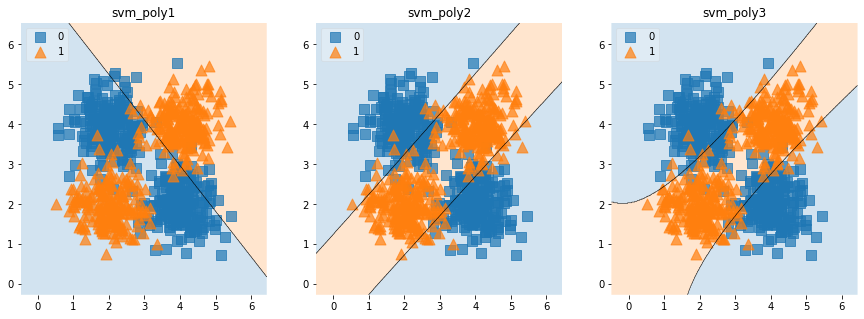

In [31]:
# Creating a list of classifiers and their names for plotting
clf_list = [svm_poly1,svm_poly2,svm_poly3]
labels = ['svm_poly1','svm_poly2','svm_poly3']


fig = plt.figure(figsize=(15,5))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data2_X, Data2_Y)
    ax = plt.subplot(1,3,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)
plt.show()

<span style="color:red">**Question 5d:** </span> Based on the decision regions, explain the reason for your observations in __Question 5c__.

It appears that the degree parameter controls the flexibility of the decision boundary.Polynomial with high degree can well seperate the data.

<span style="color:red">**Question 5e:** </span>  Compute the 10-fold cross-validation accuracy for an SVM with an RBF kernel and gamma values 0.01, 0.1, and 1.

In [32]:
svm_rbf1 = SVC(C = 0.5, kernel='rbf', gamma=0.01) 
svm_rbf1_scores = cross_val_score(svm_rbf1, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print (svm_rbf1_scores)
[svm_rbf1_scores.mean(), svm_rbf1_scores.std()]

[0.375  0.3125 0.0875 0.25   0.4375 0.3375 0.3    0.3    0.275  0.3375]


[0.30124999999999996, 0.08704345179276841]

In [33]:
svm_rbf2 = SVC(C = 0.5, kernel='rbf', gamma=0.1) 
svm_rbf2_scores = cross_val_score(svm_rbf2, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print (svm_rbf2_scores)
[svm_rbf2_scores.mean(), svm_rbf2_scores.std()]

[0.975  0.9    0.9375 0.9    0.9625 0.9375 0.8875 0.9375 0.9625 0.9625]


[0.93625, 0.02928843628464996]

In [34]:
svm_rbf3 = SVC(C = 0.5, kernel='rbf', gamma=1) 
svm_rbf3_scores = cross_val_score(svm_rbf3, Data2_X, Data2_Y, cv=10, scoring='accuracy')
print (svm_rbf3_scores)
[svm_rbf3_scores.mean(), svm_rbf3_scores.std()]

[0.9875 0.9125 0.95   0.925  0.9625 0.9375 0.875  0.9375 0.9625 0.95  ]


[0.9399999999999998, 0.029474565306379]

<span style="color:red">**Question 5f:** </span> Rank the RBF kernels in decreasing order of accuracy.

rbf3>2>1

<span style="color:red">**Question 5g:** </span>  Plot decision regions for the above RBF Kernels

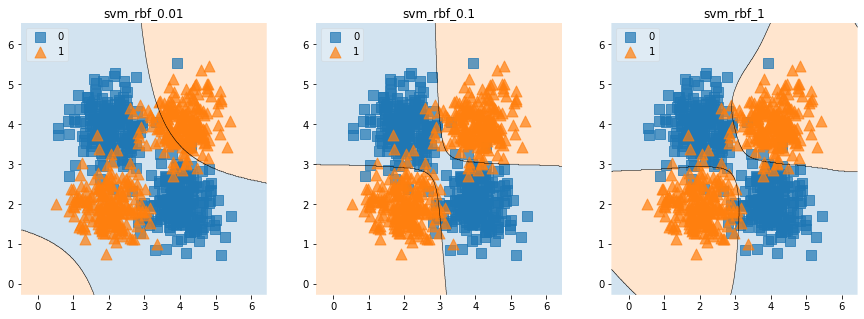

In [35]:
# Creating a list of classifiers and their names for plotting
clf_list = [svm_rbf1,svm_rbf2,svm_rbf3]
labels = ['svm_rbf_0.01','svm_rbf_0.1','svm_rbf_1']


fig = plt.figure(figsize=(15,5))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data2_X, Data2_Y)
    ax = plt.subplot(1,3,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)
plt.show()

<span style="color:red">**Question 5h:** </span>  Explain the reason for your observations in __Question 5f__ from the above decision regions.

Higher the value of Gamma, decision boundary will depend on points close to the decision boundary and near points carry more weights than far away points due to which our decision boundary looks more like a curve and high accuracy is obtained. Lower the value of Gamma, farther points carry more weights than near ones'. 
Also higher value of Gamma overfits data whereas lower value underfits. Hence we need to choose an optimal one.

<span style="color:red">**Question 5i:** </span>  Between SVM with a Polynomial kernel and SVM with an RBF kernel, which one is ideally suited of Data3? Explain your reason.

RBF Kernel is best suited for Data3. RBF uses normal curves around the data points, and sums these so that the decision boundary becomes absolute and classifies perfectly in Data3 as shown below.

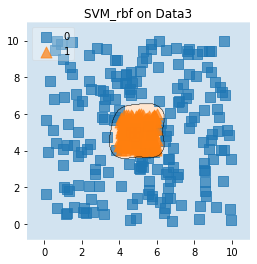

In [36]:
svm_rbf = SVC(C = 0.5, kernel='rbf', gamma=1) 
fig = plt.figure(figsize=(4,4))
svm_rbf.fit(Data3_X,Data3_Y)
plot_decision_regions(X=Data3_X, y=Data3_Y, clf=svm_rbf, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title('SVM_rbf on Data3')
plt.show()

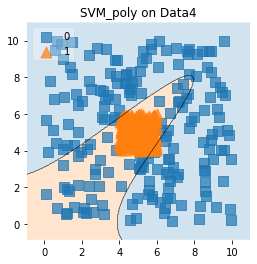

In [37]:
svm_poly = SVC(C=0.5, kernel='poly',degree=3, gamma = 'auto')
fig = plt.figure(figsize=(4,4))
svm_poly.fit(Data3_X,Data3_Y)
plot_decision_regions(X=Data3_X, y=Data3_Y, clf=svm_poly, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title('SVM_poly on Data4')
plt.show()

### 6. Classification Evaluation

<span style="color:red">**Question 6a:** </span>

Run SVM classifier (with RBF kernel and gamma=0.1) on __Data2__ and compute the mean of k-fold cross-validation accuracies for cv = 3, 4, 5 and 6. Report the mean of accuracies for each choice of 'cv' and explain the reason for any differences in the mean accuracy you observe.

In [38]:
svm_rbf_scores_cv3 = cross_val_score(svm_rbf2, Data2_X, Data2_Y, cv=3, scoring='accuracy')
print (svm_rbf_scores_cv3)
svm_rbf_scores_cv3.mean()

[0.87313433 0.93609023 0.90225564]


0.903826731006621

In [39]:
svm_rbf_scores_cv4 = cross_val_score(svm_rbf2, Data2_X, Data2_Y, cv=4, scoring='accuracy')
print (svm_rbf_scores_cv4)
svm_rbf_scores_cv4.mean()

[0.91  0.92  0.895 0.94 ]


0.91625

In [40]:
svm_rbf_scores_cv5 = cross_val_score(svm_rbf2, Data2_X, Data2_Y, cv=5, scoring='accuracy')
print (svm_rbf_scores_cv5)
svm_rbf_scores_cv5.mean()

[0.91875 0.9     0.95    0.9125  0.95625]


0.9275

In [41]:
svm_rbf_scores_cv6 = cross_val_score(svm_rbf2, Data2_X, Data2_Y, cv=6, scoring='accuracy')
print (svm_rbf_scores_cv6)
svm_rbf_scores_cv6.mean()

[0.95522388 0.89552239 0.94776119 0.91044776 0.93939394 0.9469697 ]


0.9325531433740389

For higher K value, we get a better estimate of the performance of our classifier.
If k is small(k=4), Training data has 300 points and test data has 100 points
If k is high(k=10), Training data has 360 points and test data has 40 points
Therefore for large k, we're learning a model from significant amount of data(unlike smaller k) through which we can well estimate the label of test data.

<span style="color:red">**Question 6b:** </span>

For DT, NB, kNN, Linear SVM, Polynomial Kernel SVM, and SVM with RBF kernel classifiers, compute the 30-fold crossvalidation __accuracies__ and __precision__ (use scoring='precision' when calling cross_val_score()) on __Data3__. Rank the classifiers based on accuracy and precision scores. Are the best classifiers ranked according to accuracy and precision the same? If not, explain the reason. 

For the classifiers, feel free to choose any parameter settings you prefer.

In [49]:
#DT
dt = DecisionTreeClassifier(max_depth=50)
dt_scores = cross_val_score(dt, Data3_X, Data3_Y, cv=30, scoring='accuracy')
dt_scores_p = cross_val_score(dt, Data3_X, Data3_Y, cv=30, scoring='precision')
print ("DT - Accuracy : " + str(dt_scores.mean()) + "  Precision : " + str(dt_scores_p.mean()))
#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_val_score(knn, Data3_X, Data3_Y, cv=30, scoring='accuracy')
knn_scores_p = cross_val_score(knn, Data3_X, Data3_Y, cv=30, scoring='precision')
print ("KNN - Accuracy : " + str(knn_scores.mean()) + " Precision : " + str(knn_scores_p.mean()))
#nb
nb = GaussianNB()
nb_scores = cross_val_score(nb, Data3_X, Data3_Y, cv=30, scoring='accuracy')
nb_scores_p = cross_val_score(nb, Data3_X, Data3_Y, cv=30, scoring='precision')
print ("NB - Accuracy : " + str(nb_scores.mean()) + " Precision : " + str(nb_scores_p.mean()))
#SVM_Linear
svm_linear = SVC(C=0.5, kernel='linear')
svm_linear_scores = cross_val_score(svm_linear, Data3_X, Data3_Y, cv=30, scoring='accuracy')
svm_linear_scores_p = cross_val_score(svm_linear, Data3_X, Data3_Y, cv=30, scoring='precision')
print("Linear SVM - Accuracy : " + str(svm_linear_scores.mean()) + " Precision : " + str(svm_linear_scores_p.mean()))
#SVM_Polynomial
svm_poly = SVC(C=0.5, kernel='poly',degree=2, gamma = 'auto')
svm_poly_scores = cross_val_score(svm_poly, Data3_X, Data3_Y, cv=30, scoring='accuracy')
svm_poly_scores_p = cross_val_score(svm_poly, Data3_X, Data3_Y, cv=30, scoring='precision')
print("Polynomial SVM - Accuracy : " + str(svm_poly_scores.mean()) + " Precision : " + str(svm_poly_scores_p.mean()))
#SVM_Rbf
svm_rbf = SVC(C = 0.5, kernel='rbf', gamma=3) 
svm_rbf_scores = cross_val_score(svm_rbf, Data3_X, Data3_Y, cv=30, scoring='accuracy')
svm_rbf_scores_p = cross_val_score(svm_rbf, Data3_X, Data3_Y, cv=30, scoring='precision')
print("SVM_RBF - Accuracy : " + str(svm_rbf_scores.mean()) + " Precision : " + str(svm_rbf_scores_p.mean()))

DT - Accuracy : 0.9468253968253969  Precision : 0.9567460317460319
KNN - Accuracy : 0.9492063492063493 Precision : 0.9188311688311689
NB - Accuracy : 0.9591269841269843 Precision : 0.9328571428571429
Linear SVM - Accuracy : 0.6428571428571429 Precision : 0.5881701631701632
Polynomial SVM - Accuracy : 0.8484126984126984 Precision : 0.7923713323713325
SVM_RBF - Accuracy : 0.9662698412698414 Precision : 0.9453571428571429


Accuracy  : SVM_RBF > NB > KNN > DT > SVM_Poly > SVM_Linear
Precision : DT > SVM_RBF > NB> KNN > SVM_Poly > SVM_Linear
Both measures are not the same. Accuracy is for the whole system whereas precision is class specific (% of positively predicted(Label 1) points out all the positive points). In DT, we observe a very small amount of wrong prediction of data labelled 1 from decision boundary plot and hence it's precision is high whereas in the SVM_RBF, we observe less precision compared to DT although accuracy is high. 

### 7. Ensemble Methods

<span style="color:red">**Question 7a:** </span>
 __Bagging:__ Create bagging classifiers each with n_estimators = 1,2,3,4,5,10, and 20. Use a **linear SVM** (with C=0.5) as a base classifier. Using __Data3__, compute the mean __5-fold__ cross validation accuracies and standard deviation for each of the bagging classifiers. State your observations on how bagging affected the mean and standard deviation of the base classifier. Explain your reason for what may have lead to these observations.

In [83]:
svm_linear = SVC(C=0.5, kernel='linear')
svm_linear_scores = cross_val_score(svm_linear, Data3_X, Data3_Y, cv=5, scoring='accuracy')
[svm_linear_scores.mean(), svm_linear_scores.std()]

[0.63, 0.02573907535246751]

In [86]:
n_est_list = [1,2,3,4,5,10,20]
for n_est in n_est_list:
    # create an instance of bagging classifier with 'n_est' estimators
    bagging = BaggingClassifier(base_estimator=svm_linear, n_estimators=n_est)
    # compute cross-validation accuracy for each bagging classifier
    scores = cross_val_score(bagging, Data3_X, Data3_Y, cv=5, scoring='accuracy')
    #print("Accuracy : " + str(scores.mean()) + " Deviation : " + str(scores.std()) + " for Estimatores : " + str(n_est))
    print("Bagging Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est)) 

Bagging Accuracy: 0.61 (+/- 0.06) #estimators: 1
Bagging Accuracy: 0.61 (+/- 0.09) #estimators: 2
Bagging Accuracy: 0.65 (+/- 0.06) #estimators: 3
Bagging Accuracy: 0.60 (+/- 0.09) #estimators: 4
Bagging Accuracy: 0.59 (+/- 0.05) #estimators: 5
Bagging Accuracy: 0.68 (+/- 0.11) #estimators: 10
Bagging Accuracy: 0.66 (+/- 0.03) #estimators: 20


We see a reduction in variance for different estimators(since we pick different samples) and mean is varying slightly from one to another.

<span style="color:red">**Question 7b:** </span>
 Plot decision regions for the above bagging classifiers. 

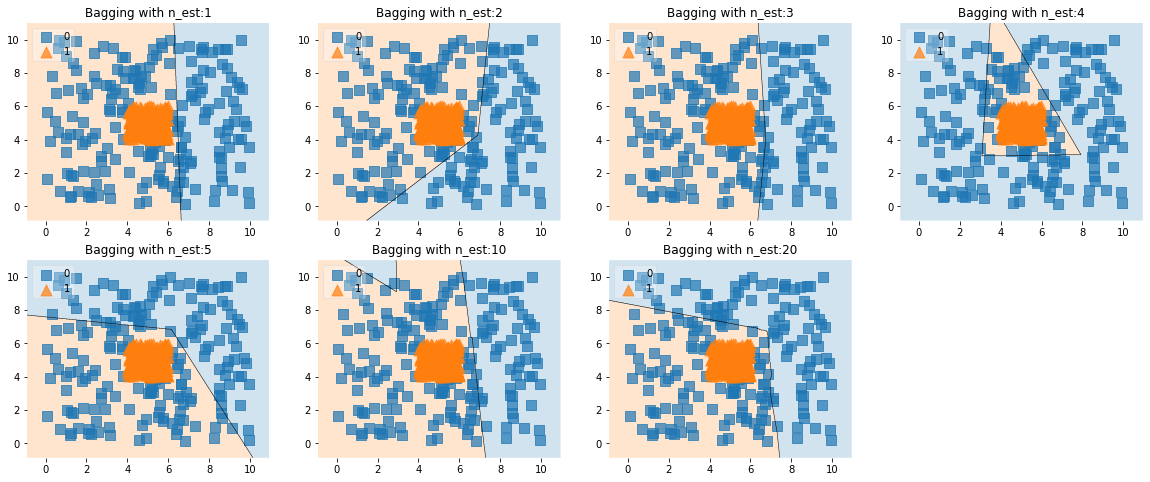

In [88]:
fig = plt.figure(figsize=(20, 8))
count = 0;
for n_est in n_est_list:
    count = count + 1;
    bagging = BaggingClassifier(base_estimator=svm_linear, n_estimators=n_est)
    bagging.fit(Data3_X, Data3_Y)
    ax = plt.subplot(2,4,count)
    fig = plot_decision_regions(X=Data3_X, y=Data3_Y, clf=bagging, legend=2,scatter_kwargs=scatter_kwargs,contourf_kwargs=contourf_kwargs,scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title('Bagging with n_est:'+str(n_est))
plt.show()


<span style="color:red">**Question 7c:** </span>
 Comment on the quality of the decision regions for a bagging classifiers with many estimators when compared to that of only one estimator. 

We don't see much improvement in the performance of the classifier. For n=1, we see high number of points being misclassified when compared to n=20.

<span style="color:red">**Question 7d:** </span>
 **Boosting:**  Create boosting classifiers each with n_estimators = 1,2,3,4,5,10, 20, and 40. Use a **Decision Tree** (with max_depth=2) as a base classifier. Using __Data2__, compute the mean **10-fold** cross validation accuracies and standard deviation for each of the bagging classifiers. State your observations on how boosting affected the mean and standard deviation of the base classifier. 

In [58]:
dt = DecisionTreeClassifier(max_depth=2)
scores = cross_val_score(dt, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[scores.mean(),scores.std()]

[0.88125, 0.028090256317805297]

In [59]:
n_est_list = [1,2,3,4,5,10,20,40]
for n_est in n_est_list:
    # create an instance of a boosting classifier with 'n_est' estimators
    boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
    # compute cross-validation accuracy for each bagging classifier
    scores = cross_val_score(boosting, Data2_X, Data2_Y, cv=10, scoring='accuracy')
    print("Boosting Accuracy: %.2f (+/- %.4f) #estimators: %d" % (scores.mean(), scores.std(), n_est)) 

Boosting Accuracy: 0.88 (+/- 0.0281) #estimators: 1
Boosting Accuracy: 0.88 (+/- 0.0292) #estimators: 2
Boosting Accuracy: 0.90 (+/- 0.0377) #estimators: 3
Boosting Accuracy: 0.90 (+/- 0.0354) #estimators: 4
Boosting Accuracy: 0.92 (+/- 0.0275) #estimators: 5
Boosting Accuracy: 0.92 (+/- 0.0354) #estimators: 10
Boosting Accuracy: 0.91 (+/- 0.0354) #estimators: 20
Boosting Accuracy: 0.91 (+/- 0.0225) #estimators: 40


Accuracy is improved from 0.88 to 0.91 using boosting and deviation has reduced from 0.028 to 0.022

<span style="color:red">**Question 7e:** </span>
 Plot decision regions for above boosting classifiers. Explain your reason for what may have lead to the observations in __Question 7d__.

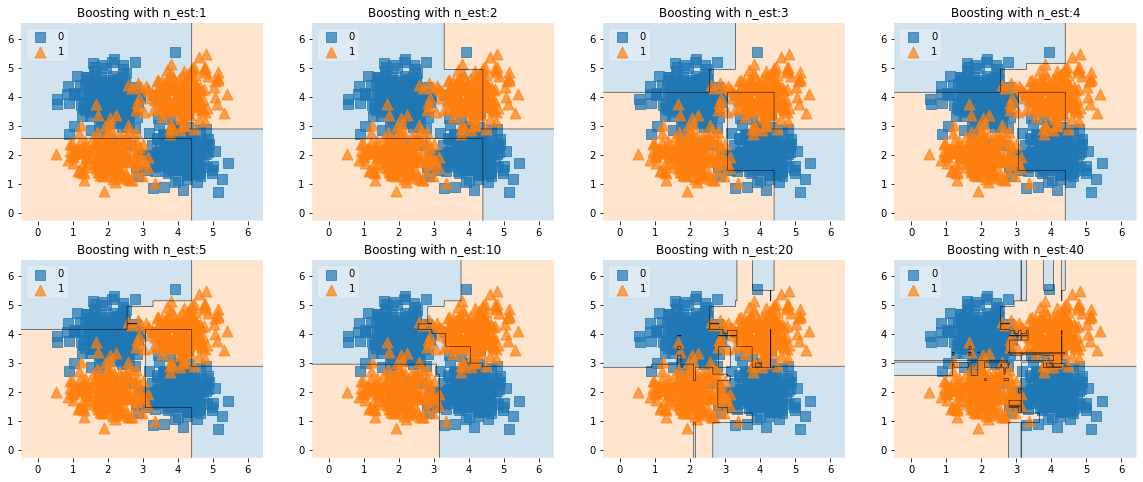

In [60]:
fig = plt.figure(figsize=(20, 8))
count = 0;
for n_est in n_est_list:
    count = count + 1;
    boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
    boosting.fit(Data2_X, Data2_Y)
    ax = plt.subplot(2,4,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=boosting, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title('Boosting with n_est:'+str(n_est))
    
plt.show()

From the above plots, we see the last one classifies data in an accurate manner whereas the first one has high misclassified data. As n_estimators increase, we see the boundary as a much better approximation of the seperation between the classes and hence we see a reduction in the errors from 1st to last which is indicated in 7d

### 8. Classification on a real-world dataset

Real world datasets typically have many attributes making it hard to visualize. This question is about using SVM and Decision Tree algorithms on a real world 'breast cancer' dataset.

The following code reads the dataset from the 'datasets' library in sklearn.

In [90]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

In [91]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [63]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Labels : Malignant (1) and benign (0)

Create dataset for classification

In [92]:
X = cancer.data
Y = cancer.target

Number of samples are:569

In [65]:
X.shape

(569, 30)

In [66]:
Y.shape

(569,)

<span style="color:red">**Question 8a:** </span>
 Of all the SVM classifiers you explored in this hands-on exercise (i.e., linear SVM, SVM with a polynomial kernel and RBF kernel), which SVM results in a highest 10-fold cross-validation accuracy on this dataset? Explore the possible parameters for each SVM to determine the best performance for that SVM. For example, when studying linear SVM, explore a range of C values [0.001, 0.01, 0.1, 1]. Similarly for degree consider [1,2]. For gamma, consider [0.001, 0.01, 0.1, 1, 10, 100].

In [69]:
#Linear SVM
for C in [0.001, 0.01, 0.1, 1] :
    svm_linear = SVC(C=C, kernel='linear')
    svm_linear_scores = cross_val_score(svm_linear, X, Y, cv=10, scoring='accuracy')
    print("C = " + str(C) + " Accuracy : " + str(svm_linear_scores.mean()))

C = 0.001 Accuracy : 0.9402460893613342
C = 0.01 Accuracy : 0.947235545760954
C = 0.1 Accuracy : 0.9472366260478783
C = 1 Accuracy : 0.9543179068360554


In [83]:
#Polynomial varying C and degree
for C in [0.001,0.01,0.1,1]:
    for d in [1,2] :
        svm_poly = SVC(C=C, kernel='poly',degree=d, gamma = 'auto')
        svm_poly_scores = cross_val_score(svm_poly, X, Y, cv=10, scoring='accuracy')
        print("C = " + str(C) + " Degree : " + str(d) + " Accuracy : " + str(svm_linear_scores.mean())) 

C = 0.001 Degree : 1 Accuracy : 0.9543179068360554
C = 0.001 Degree : 2 Accuracy : 0.9543179068360554
C = 0.01 Degree : 1 Accuracy : 0.9543179068360554
C = 0.01 Degree : 2 Accuracy : 0.9543179068360554
C = 0.1 Degree : 1 Accuracy : 0.9543179068360554
C = 0.1 Degree : 2 Accuracy : 0.9543179068360554
C = 1 Degree : 1 Accuracy : 0.9543179068360554
C = 1 Degree : 2 Accuracy : 0.9543179068360554


In [93]:
#RBF varying C and gamma
for C in [0.001,0.01,0.1,1] :
    for g in [0.001, 0.01, 0.1, 1, 10, 100] :
        svm_rbf = SVC(C = C, kernel='rbf', gamma=g) 
        svm_rbf_scores = cross_val_score(svm_rbf, X, Y, cv=10, scoring='accuracy')
        print("C = " + str(C) + " Gamma : " + str(g) + " Accuracy : " + str(svm_rbf_scores.mean())) 

C = 0.001 Gamma : 0.001 Accuracy : 0.6274274047186933
C = 0.001 Gamma : 0.01 Accuracy : 0.6274274047186933
C = 0.001 Gamma : 0.1 Accuracy : 0.6274274047186933
C = 0.001 Gamma : 1 Accuracy : 0.6274274047186933
C = 0.001 Gamma : 10 Accuracy : 0.6274274047186933
C = 0.001 Gamma : 100 Accuracy : 0.6274274047186933
C = 0.01 Gamma : 0.001 Accuracy : 0.6274274047186933
C = 0.01 Gamma : 0.01 Accuracy : 0.6274274047186933
C = 0.01 Gamma : 0.1 Accuracy : 0.6274274047186933
C = 0.01 Gamma : 1 Accuracy : 0.6274274047186933
C = 0.01 Gamma : 10 Accuracy : 0.6274274047186933
C = 0.01 Gamma : 100 Accuracy : 0.6274274047186933
C = 0.1 Gamma : 0.001 Accuracy : 0.6274274047186933
C = 0.1 Gamma : 0.01 Accuracy : 0.6274274047186933
C = 0.1 Gamma : 0.1 Accuracy : 0.6274274047186933
C = 0.1 Gamma : 1 Accuracy : 0.6274274047186933
C = 0.1 Gamma : 10 Accuracy : 0.6274274047186933
C = 0.1 Gamma : 100 Accuracy : 0.6274274047186933
C = 1 Gamma : 0.001 Accuracy : 0.9242416385792065
C = 1 Gamma : 0.01 Accuracy : 0.

Linear SVM with C=1 is 95.4% accurate
Polynomial SVM with C in range (0.001,0.01,0.1,1) and degree (1,2) is 95.4% accurate 
RB kernel SVM with C = 1 Gamma=0.001 is 92.4% accurate

<span style="color:red">**Question 8b:** </span>
 Similar to __Question 8a__ explore decision trees with different max_depth to determine which values returns the best classifier.

In [75]:
for d in [2,4,6,8,10,50] :
    dt = DecisionTreeClassifier(max_depth=d)
    dt_scores = cross_val_score(dt, X, Y, cv=10, scoring='accuracy')
    print("Max_Depth = " + str(d) + " Accuracy : " + str(dt_scores.mean()))

Max_Depth = 2 Accuracy : 0.9193781868464264
Max_Depth = 4 Accuracy : 0.9263363149252442
Max_Depth = 6 Accuracy : 0.9229506957047791
Max_Depth = 8 Accuracy : 0.9156555181056089
Max_Depth = 10 Accuracy : 0.9104831043125055
Max_Depth = 50 Accuracy : 0.9140523723100855


Decision Tree with depth 4,6 gives high accuracy.

<span style="color:red">**Question 8c:** </span>
 Imagine a scenario where you are working at a cancer center as a data scientist tasked with identifying the characteristics that distinguish malignant tumors from benign tumors. Based on your knowledge of classification techniques which approach would you use and why?

Linear SVM is well suited for this data. We can choose among linear or RB SVM but from 8(a) we observe that linear SVM is most accurate